In [11]:
from trader.Iterator import Iterator
from trader.ATrader import ATrader
import pandas as pd

import psycopg2 as pg
import pandas.io.sql as psql

connection = pg.connect("host=localhost dbname=postgres user=postgres password=postgres port=5433")


def calculate_optimal_ranges(symbol_id, portfolio, lot):
    query_string = f'SELECT * FROM tradecloud_price WHERE symbol_id={symbol_id} ORDER BY timestamp ASC;'
    df = psql.read_sql_query(query_string, connection)
    it = Iterator(df)
    return it.calculate(it.compose_iterator_dataframe(), portfolio, lot)


In [12]:
# df = calculate_optimal_ranges(23, 2000, 500)
# df.head(10)



In [13]:
symbol_id = 23
query_string = f'SELECT * FROM tradecloud_price WHERE symbol_id={symbol_id} ORDER BY timestamp ASC;'
df = psql.read_sql_query(query_string, connection)

,id,timestamp,open,high,low,volume,symbol_id
0,138145,2004-08-19 00:00:00+00:00,100.01,104.06,95.96,44659000,23
1,138144,2004-08-20 00:00:00+00:00,101.01,109.08,100.50,22834300,23
2,138143,2004-08-23 00:00:00+00:00,110.76,113.48,109.05,18256100,23
3,138142,2004-08-24 00:00:00+00:00,111.24,111.60,103.57,15247300,23
4,138141,2004-08-25 00:00:00+00:00,104.76,108.00,103.88,9188600,23


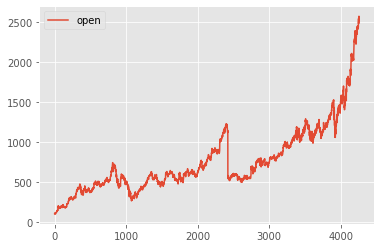

In [14]:
df.plot(y=['open'])
df.head()

In [15]:
trader = ATrader(df.copy())
trader.analyze(50, 200, 49)
report = trader.trade(5000, 20)

,datetime,price,stocks_count,portfolio,%,action
0,2014-04-04 00:00:00+00:00,578.55,1.728459,4001.000000,0.0,buy
1,2015-07-29 00:00:00+00:00,662.26,1.728459,5144.544620,2.9,sell
2,2018-02-15 00:00:00+00:00,1083.45,0.949660,4116.664605,0.0,buy
3,2020-04-21 00:00:00+00:00,1242.71,0.949660,5295.636199,5.9,sell
4,2020-09-21 00:00:00+00:00,1431.62,0.739810,4237.568087,0.0,buy
5,2020-11-11 00:00:00+00:00,1748.40,0.739810,5529.758953,10.6,sell
6,2008-03-19 00:00:00+00:00,441.11,2.267008,4001.000000,0.0,buy
7,2009-06-25 00:00:00+00:00,407.00,2.267008,4922.749677,-1.5,sell
8,2010-07-07 00:00:00+00:00,438.31,2.246241,3939.184291,0.0,buy
9,2010-11-26 00:00:00+00:00,590.46,2.246241,5264.173494,5.3,sell


<Figure size 800x800 with 0 Axes>

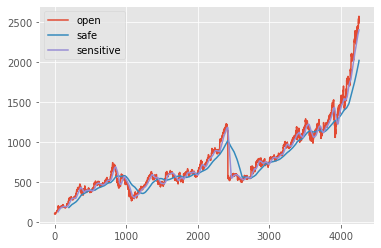

In [16]:
trader.plot(['open','safe','sensitive'])
trader.report()

In [17]:
trader.commission

14.43534649170331